# LGMVIP (JANUARY) - Data Science Intern

# TASK - 2 : Stock Market Prediction And Forecasting Using Stacked LSTM


# NAME        : Anushka Jain

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# DATA ACQUISITION / IMPORT THE DATASET

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.shape

(2035, 8)

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

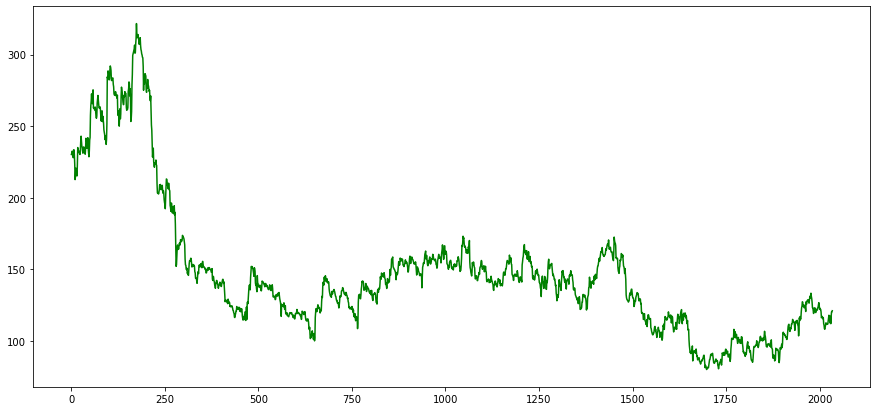

In [12]:
plt.figure(figsize=(15,7))
plt.plot(df['Low'],color='g')
plt.show()

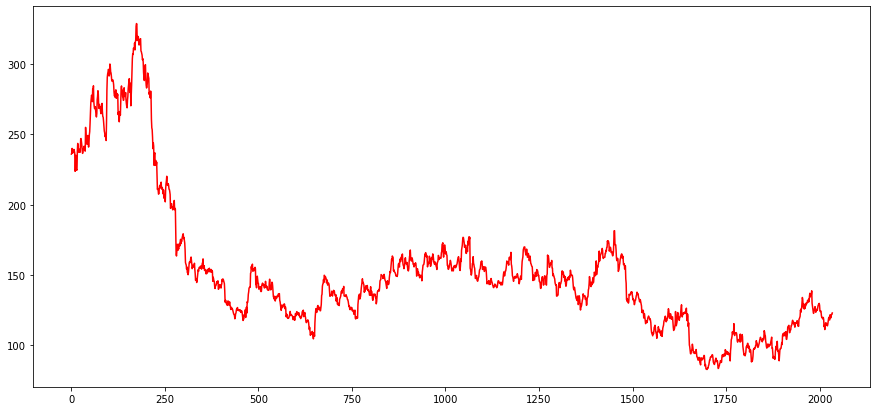

In [14]:
plt.figure(figsize=(15,7))
plt.plot(df['High'],color='r')
plt.show()

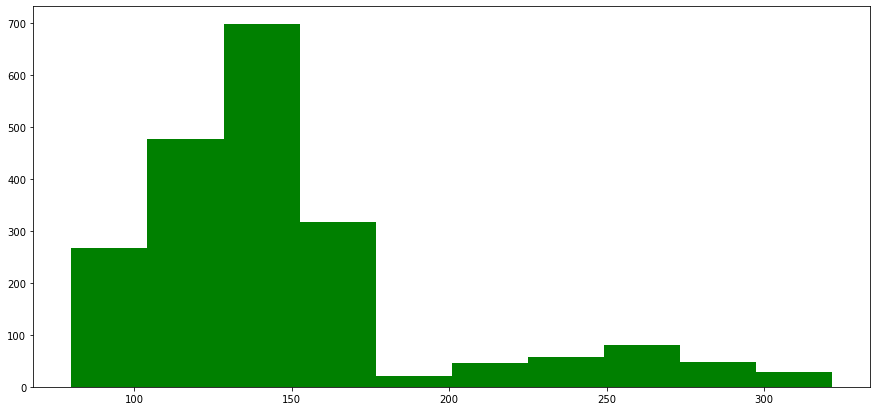

In [11]:
plt.figure(figsize=(15,7))
plt.hist(df['Low'],color='g')
plt.show()

In [13]:
close_df=df['Low']

In [14]:
close_df

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64

# MIN MAX SCALER 

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
df1_close=scaler.fit_transform(np.array(close_df).reshape(-1,1))

In [20]:
print("HERE DATA IS BEING SET BETWEEN 0 AND 1")
print("---------------------------------------")
print(df1_close)

HERE DATA IS BEING SET BETWEEN 0 AND 1
---------------------------------------
[[0.62156011]
 [0.6252845 ]
 [0.63107801]
 ...
 [0.16656321]
 [0.16656321]
 [0.16987378]]


# TRAIN-TEST SPLIT

In [21]:
##splitting dataset into train and test split

In [22]:
training_size=int(len(df1_close)*0.65)

In [23]:
test_size=len(df1_close)-training_size

In [24]:
train_data,test_data=df1_close[0:training_size,:],df1_close[training_size:len(df1_close),:1]

In [25]:
print("THE SHPAE OF RECORD : ",training_size,test_size)

THE SHPAE OF RECORD :  1322 713


CONVERT ARRAY ELEMENTS TO DATASET MATRIX

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print("Shape of X train : ",X_train.shape)

Shape of X train :  (1221, 100)


# Reshape input to be [samples, time steps, features] which is required for LSTM

In [37]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
### Create the Stacked LSTM model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# We will be using a sequential model and adding the layers of the LSTM as said, in the above sentence. The first layer should be the time step in 1.

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# SUMMARY

In [43]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Now the final part is to fit the X_train and the y_train.

In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 290ms/step - loss: 0.0280 - val_loss: 0.0064
Epoch 2/100
20/20 [==============================] - 4s 217ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 3/100
20/20 [==============================] - 4s 218ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 4s 218ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 4s 216ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 4s 222ms/step - loss: 0.0016 - val_loss: 9.1113e-04
Epoch 7/100
20/20 [==============================] - 4s 217ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0014 - val_loss: 8.4376e-04
Epoch 10/100
20/20 [==============================] - 4s 215ms/step - loss: 0.0017

In [47]:
import tensorflow as tf

# Prediction

Predict both the X_train and the X_test, now let’s scaler inverse transform because I want to see the root mean square performance.

In [50]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.19261746078712

In [52]:
math.sqrt(mean_squared_error(ytest,test_predict))

116.25307956354976

# Plotting 
# Shift train predictions for plotting

In [54]:
look_back=100
trainPredictPlot = numpy.empty_like(df1_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting

In [56]:
testPredictPlot = numpy.empty_like(df1_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1_close)-1, :] = test_predict

# Plot baseline and predictions

<Figure size 720x1440 with 0 Axes>

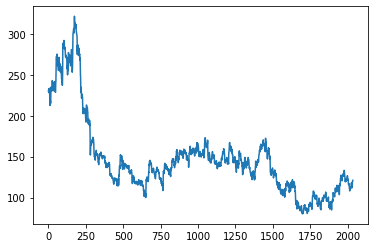

<Figure size 720x1440 with 0 Axes>

In [62]:
plt.plot(scaler.inverse_transform(df1_close))
plt.figure(figsize=(10,20))

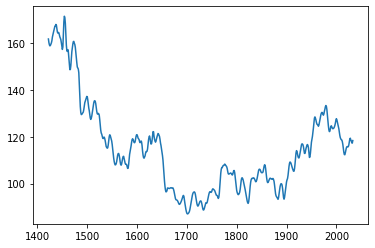

In [60]:
plt.plot(testPredictPlot)
plt.show()

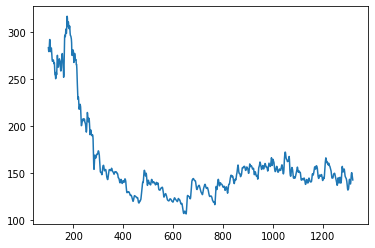

In [61]:
plt.plot(trainPredictPlot)

In [63]:
# Here the time step is 100, Whatever the values in train predict and test predict.Don’t forget to plot the inverse of scaler transform.

# Green indicates the Predicted Data

# Blue indicates the Complete Data

# Orange indicates the Train Data

# Predicting Stock Price For Next 30 Days

In [65]:
len(test_data)

713

In [66]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [67]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# Demonstrate prediction for next 10 days

In [69]:
from numpy import array

lst_output=[]
n_steps=100
nextNumberOfDays=30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17327002]
101
1 day input [0.13945789 0.13904407 0.13738879 0.13490586 0.14214773 0.13656114
 0.12849162 0.12456031 0.09724809 0.1127664  0.14959652 0.14111318
 0.15311401 0.1452514  0.14607904 0.16552866 0.17835713 0.18290917
 0.19573764 0.19449617 0.18270226 0.18415063 0.18704738 0.17835713
 0.18208152 0.18435754 0.17794331 0.16759777 0.19573764 0.18849576
 0.19325471 0.19966894 0.1988413  0.20153114 0.2007035  0.19925512
 0.19180633 0.20028968 0.21125595 0.21249741 0.20691082 0.22056694
 0.21146286 0.20546245 0.19490999 0.17877095 0.17877095 0.17090834
 0.16201117 0.17049452 0.174012   0.17856404 0.17732257 0.16511484
 0.16470101 0.16987378 0.17380509 0.1721498  0.17173598 0.17794331
 0.18001241 0.1874612  0.19325471 0.18663356 0.17421891 0.17711566
 0.17318436 0.17380509 0.1663563  0.14938961 0.15187254 0.15352783
 0.15145872 0.14649286 0.1491827  0.13242293 0.12849162 0.11793917
 0.11628388 0.12290503 0.12725016 0.13490586 0.13345748 0.13242293
 0.13056073 0.13242293 0.13138837

In [70]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [71]:
import matplotlib.pyplot as plt

In [72]:
len(df1_close)

2035

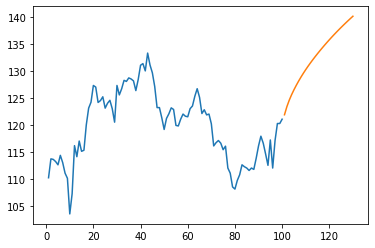

In [73]:
plt.plot(day_new,scaler.inverse_transform(df1_close[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

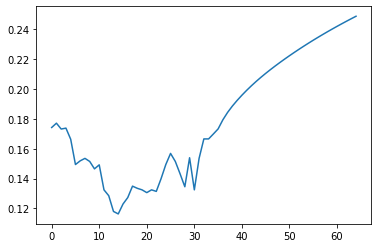

In [74]:
df3=df1_close.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [75]:
df3=scaler.inverse_transform(df3).tolist()

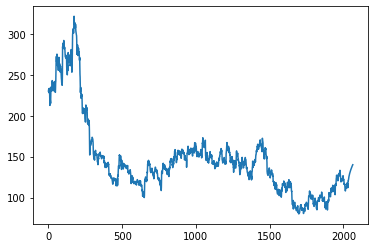

In [76]:
plt.plot(df3)

# THANKYOU!